In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [3]:
books = pd.read_csv("data_sets/books_clean.csv")
reviews = pd.read_csv("data_sets/reviews_for_recommenders.csv")

In [10]:
# Change the values of missing
missing_val = books["publisher"].iloc[0]
reviews = reviews.replace(missing_val, None)
books = books.replace(missing_val, None)

In [12]:
books["publisher"].iloc[0] == None

True

In [18]:
ratings

<bound method IndexOpsMixin.tolist of 0          1
1          9
2          4
3         32
4          1
          ..
212398    28
212399     2
212400     3
212401     4
212402     4
Name: ratings_count, Length: 212403, dtype: int64>

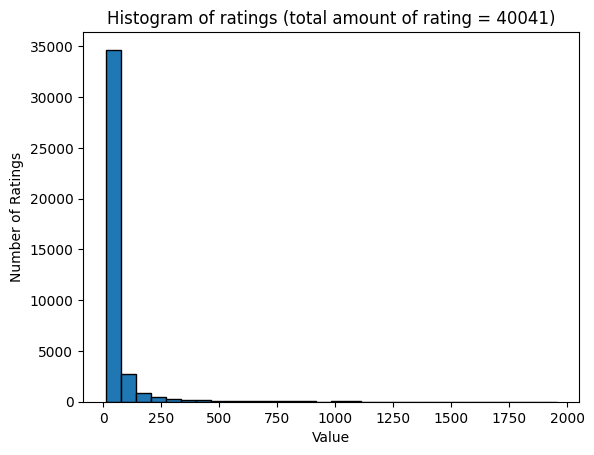

In [49]:
ratings = books["ratings_count"].tolist()

def make_hist_plot(threshold_low, threshold_high):
    threshold_ratings = []

    for i in ratings:
        if threshold_low < i < threshold_high:
            threshold_ratings.append(i)

    # Create histogram
    plt.hist(threshold_ratings, bins=30, edgecolor='black')

    # Add labels and title
    plt.xlabel('Value')
    plt.ylabel('Number of Ratings')
    plt.title('Histogram of ratings (total amount of rating = ' + str(len(threshold_ratings)) + ')')

    # Show the histogram
    plt.show()

make_hist_plot(10, 2000)

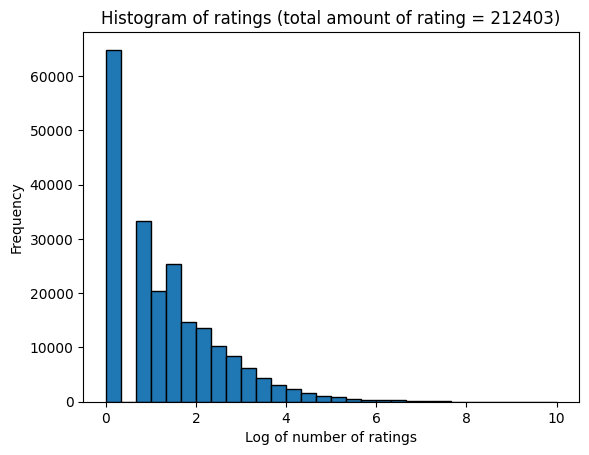

In [50]:
log_ratings = np.log(ratings)

def make_log_hist_plot():
    # Create histogram
    plt.hist(log_ratings, bins=30, edgecolor='black')

    # Add labels and title
    plt.xlabel('Log of number of ratings')
    plt.ylabel('Frequency')
    plt.title('Histogram of ratings (total amount of rating = ' + str(len(log_ratings)) + ')')

    # Show the histogram
    plt.show()

make_log_hist_plot()

In [73]:
def total_with_minimum(minimum, my_list):
    total = 0
    count = 0
    for i in my_list:
        if i >= minimum:
            total += i
            count += 1
    return total, count

cut_offs = [1, 2, 3, 5, 10, 20, 25, 50, 100, 250, 500, 1000]

data = [total_with_minimum(i, ratings) for i in cut_offs]
print(data)

# Extract x and y values from the list of tuples
x_values = [item[0] for item in data]
y_values = [item[1] for item in data]

[(2999792, 212403), (2934935, 147546), (2868181, 114169), (2747696, 78967), (2517421, 43902), (2227994, 22431), (2126513, 17789), (1809521, 8478), (1503646, 4023), (1114746, 1461), (836811, 663), (548273, 247)]


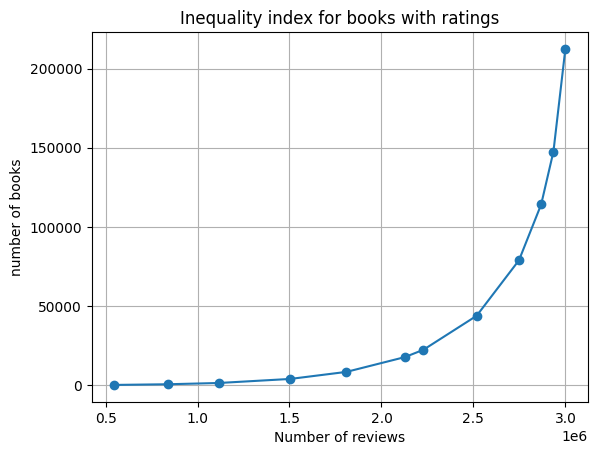

In [75]:
# Plot the data
plt.plot(x_values, y_values, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of reviews')
plt.ylabel('number of books')
plt.title('Inequality index for books with ratings')

# Show the plot
plt.grid(True)
plt.show()

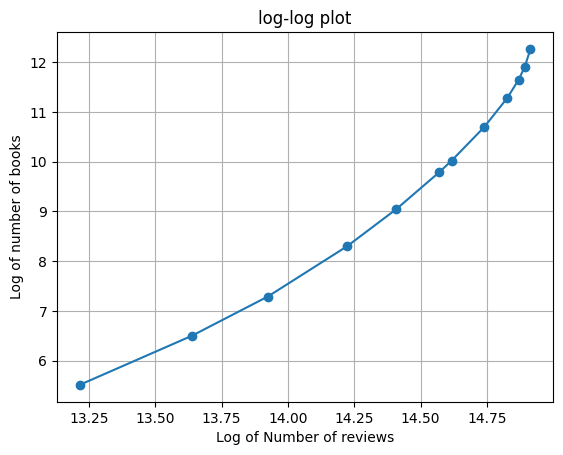

In [78]:
# Plot the data
plt.plot(np.log(x_values), np.log(y_values), marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Log of Number of reviews')
plt.ylabel('Log of number of books')
plt.title('log-log plot')

# Show the plot
plt.grid(True)
plt.show()

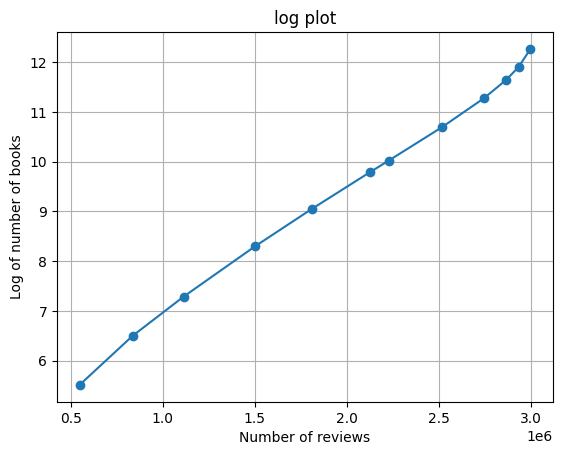

In [76]:
# Plot the data
plt.plot(x_values, np.log(y_values), marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of reviews')
plt.ylabel('Log of number of books')
plt.title('log plot')

# Show the plot
plt.grid(True)
plt.show()